## Small Images

In [1]:
# importing required modules 
from zipfile import ZipFile 
import PIL  # Creating collage
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv  
import numpy as np


# Extract files for zip 

file_name = "readonly/small_img.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir() 

    print('Extracting all the files now...') 
    zip.extractall('small_data')  # Putting the extracted file into another folder
    name_list = zip.namelist() 
    print('Done!')  

path = 'small_data/'  

namelist = [path + i for i in name_list]  # Create a list of file name

text_list = []
contact_list = []

for i in range(len(namelist)):

    image=Image.open(namelist[i])
    image=image.convert('RGB')

    display(image)

    # Extract text

    text = pytesseract.image_to_string(image)

    text = text.split("\n")
    text = ''.join(text)
    text = text.split('-')
    text = ''.join(text)
    text = text.lower()

    text_list.append(text)

    # extract Images

    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

    face_list = []  # Create list to store face objects

    faces = []

    im = cv.imread(namelist[i])

    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, minNeighbors = 7)

    rec = faces.tolist()[0]

    # Draw rectangles

    for i in range(len(faces)):
        rec=faces.tolist()[0]
        face = image.crop((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]))

        face = face.resize((200, 200))
        
        face_list.append(face)

    # Calculate size for the return collage

    multiple = int(np.ceil(np.sqrt(len(face_list))))

    # Creating contact sheet

    contact_sheet=PIL.Image.new(face_list[0].mode, (200*multiple,200*multiple))

    x=0
    y=0

    for img in face_list:

        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y))
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+200 == contact_sheet.width:
            x=0
            y=y+200
        else:
            x=x+200

    contact_list.append(contact_sheet)

In [2]:
# text_list, name_list(file) and contact_list

def face_search(string):

    for i in range(len(text_list)):
        if string.lower() in text_list[i]:
            print('Results found in file {}'.format(name_list[i]))
            if contact_list[i].width == 0:
                print('But there were no faces in that file')
            else: 
                display(contact_list[i])
            

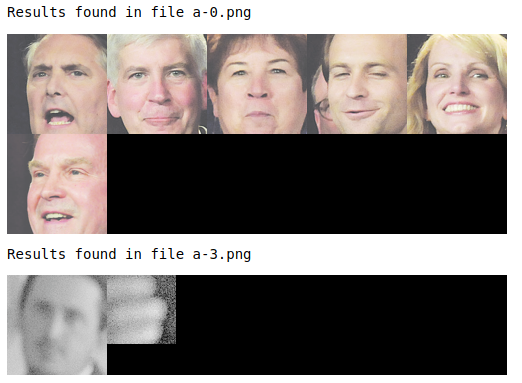

In [5]:
face_search('Chris')

## Large Project

In [8]:
# importing required modules 
from zipfile import ZipFile 
import PIL  # Creating collage
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv  
import numpy as np


# Extract files for zip 

file_name = "readonly/images.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir() 

    print('Extracting all the files now...') 
    zip.extractall('big_data')  # Putting the extracted file into another folder
    name_list = zip.namelist() 
    print('Done!')  

path = 'big_data/'  

namelist = [path + i for i in name_list]  # Create a list of file name

text_list = []
contact_list = []

for i in range(len(namelist)):

    image=Image.open(namelist[i])
    image=image.convert('RGB')

    display(image)

    # Extract text

    text = pytesseract.image_to_string(image)

    text = text.split("\n")
    text = ''.join(text)
    text = text.split('-')
    text = ''.join(text)
    text = text.lower()

    text_list.append(text)

    # extract Images

    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

    face_list = []  # Create list to store face objects

    faces = []

    im = cv.imread(namelist[i])

    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, minNeighbors = 7)

    rec = faces.tolist()[0]

    # Draw rectangles

    for i in range(len(faces)):
        rec=faces.tolist()[0]
        face = image.crop((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]))

        face = face.resize((200, 200))
        
        face_list.append(face)

    # Calculate size for the return collage

    multiple = int(np.ceil(np.sqrt(len(face_list))))

    # Creating contact sheet

    contact_sheet=PIL.Image.new(face_list[0].mode, (200*multiple,200*multiple))

    x=0
    y=0

    for img in face_list:

        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y))
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+200 == contact_sheet.width:
            x=0
            y=y+200
        else:
            x=x+200

    contact_list.append(contact_sheet)

In [9]:
# text_list, name_list(file) and contact_list

def face_search(string):

    for i in range(len(text_list)):
        if string.lower() in text_list[i]:
            print('Results found in file {}'.format(name_list[i]))
            if contact_list[i].width == 0:
                print('But there were no faces in that file')
            else: 
                display(contact_list[i])
            

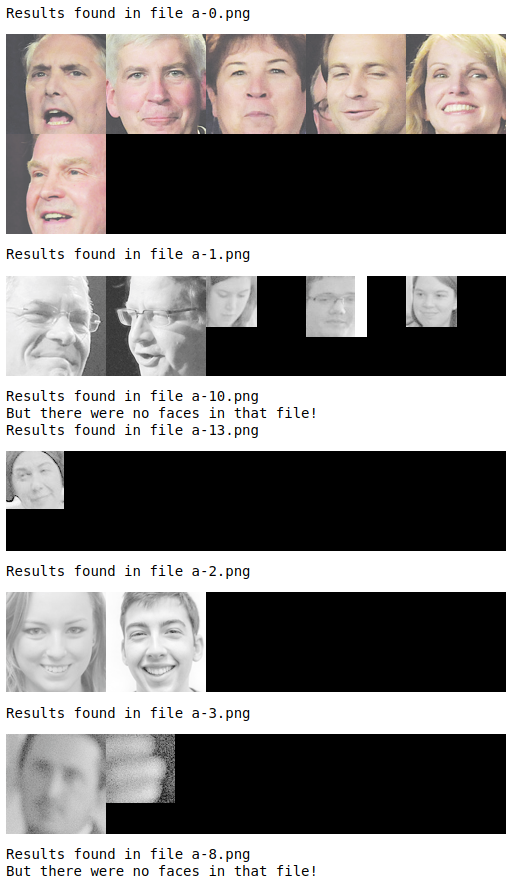

In [10]:
face_search('Mark')